In [21]:
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("S02-hw-dataset.csv")

display(df.head())
display(df.info())
display(df.describe())

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


None

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [23]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [24]:
df.duplicated().sum()

np.int64(1)

In [25]:
display(Markdown("## Отрицательные покупки"))
display(df[df["purchases"] < 0])

display(Markdown("## Отрицательная выручка"))
display(df[df["revenue"] < 0])

display(Markdown("## Нереалистичный возраст"))
display(df[(df["age"] > 100) | (df["age"] < 0)])

display(Markdown("## Нулевая выручка при покупках"))
display(df[(df["revenue"] == 0) & (df["purchases"] > 0)])

display(Markdown("## Ненулевая выручка без покупок"))
display(df[(df["revenue"] > 0) & (df["purchases"] == 0)])

"""
Было обнаружено, что существуют отрицательные покупки, нереалистичный возраст более 100 лет, нулевая выручка при покупках.
"""

## Отрицательные покупки

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


## Отрицательная выручка

,user_id,age,country,purchases,revenue


## Нереалистичный возраст

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


## Нулевая выручка при покупках

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


## Ненулевая выручка без покупок

,user_id,age,country,purchases,revenue


'\nБыло обнаружено, что существуют отрицательные покупки, нереалистичный возраст более 100 лет, нулевая выручка при покупках.\n'

In [26]:
display(Markdown("## Кол-во стран"))
display(df["country"].value_counts())

display(Markdown("## Сумма выручки по странам"))
display(df.groupby("country")["revenue"].sum())

display(Markdown("## Статистика по страннам и возрасту"))
bins = [0, 18, 30, 45, 60, 100, 150]
labels = ["0-17", "18-30", "31-45", "46-60", "61-100", "100+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)
grouped = df.groupby(["country", "age_group"]).agg(
    total_purchases=("purchases", "sum"),
    avg_purchases=("purchases", "mean"),
    avg_revenue=("revenue", "mean"),
).reset_index()

display(grouped)
"""
В данных доминируют странны RU и FR.
Во всех странах люди возрастом 31-45 больше всего покупают и тратят в среднем, кроме России, там больше трат у возраста 0-17
"""

## Кол-во стран

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

## Сумма выручки по странам

country
CN     2108
DE     8673
FR     8111
RU    10271
US     4459
Name: revenue, dtype: int64

## Статистика по страннам и возрасту

C:\Users\user\AppData\Local\Temp\ipykernel_1768\517003975.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["country", "age_group"]).agg(


,country,age_group,total_purchases,avg_purchases,avg_revenue
0,CN,0-17,0,NaN,NaN
1,CN,18-30,9,4.500000,1054.000000
2,CN,31-45,0,NaN,NaN
3,CN,46-60,0,NaN,NaN
4,CN,61-100,0,NaN,NaN
5,CN,100+,0,NaN,NaN
6,DE,0-17,0,NaN,NaN
7,DE,18-30,4,4.000000,1104.000000
8,DE,31-45,23,7.666667,1857.000000
9,DE,46-60,6,6.000000,702.000000


'\nВ данных доминируют странны RU и FR.\nВо всех странах люди возрастом 31-45 больше всего покупают и тратят в среднем, кроме России, там больше трат у возраста 0-17\n'

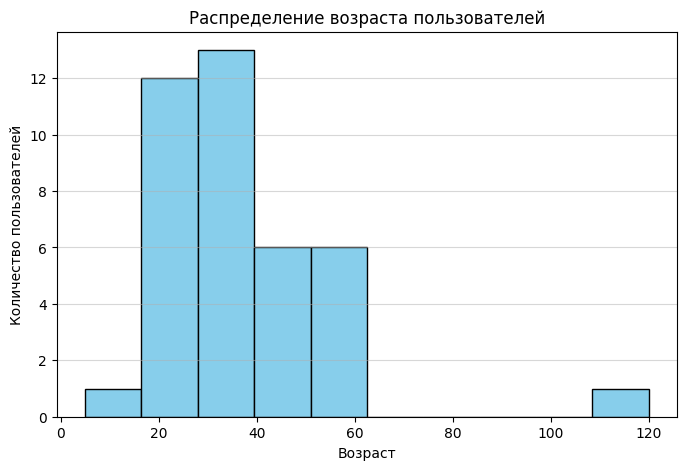

<Figure size 640x480 with 0 Axes>

In [27]:
#  график показывает распределение возраста, наиболее частый возраст 30-40 лет
plt.figure(figsize=(8,5))
plt.hist(df["age"].dropna(), bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Возраст")
plt.ylabel("Количество пользователей")
plt.title("Распределение возраста пользователей")
plt.grid(axis="y", alpha=0.5)
plt.show()

plt.savefig("figures/age_histogram.png")


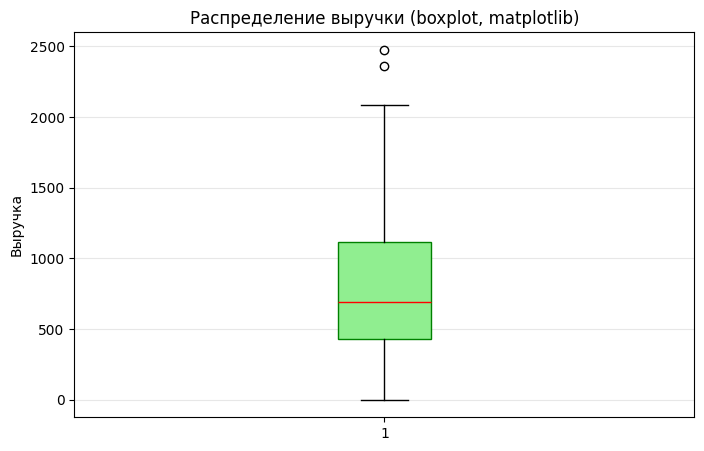

<Figure size 640x480 with 0 Axes>

In [28]:
# график показывает распределение выручки, основная масса выручек от 500 до 1200
plt.figure(figsize=(8,5))
plt.boxplot(df["revenue"], vert=True, patch_artist=True, 
            boxprops=dict(facecolor="lightgreen", color="green"),
            medianprops=dict(color="red"))
plt.ylabel("Выручка")
plt.title("Распределение выручки (boxplot, matplotlib)")
plt.grid(axis="y", alpha=0.3)
plt.show()

# Сохраняем график
plt.savefig("figures/revenue_boxplot.png")

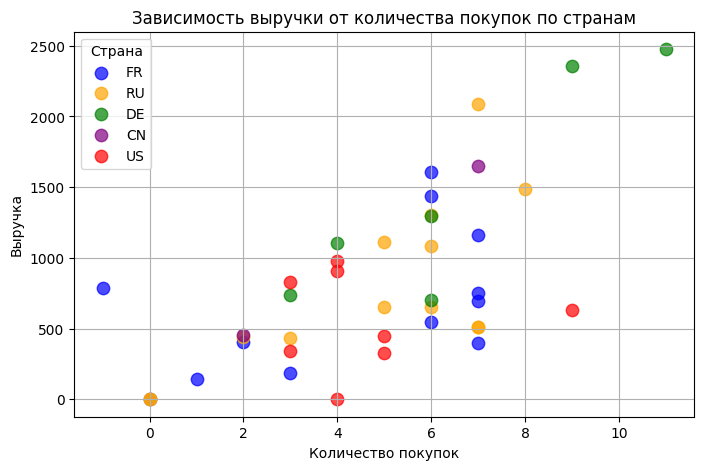

<Figure size 640x480 with 0 Axes>

In [29]:
# график показывает зависимость выручки от покупок. Как правило, чем больше покупок, тем выше выручка
colors = {"FR":"blue", "RU":"orange", "DE":"green", "CN": "purple", "US": "red"}

plt.figure(figsize=(8,5))

for country in df["country"].unique():
    subset = df[df["country"] == country]
    plt.scatter(subset["purchases"], subset["revenue"], 
                label=country, s=80, alpha=0.7, c=colors[country])

plt.xlabel("Количество покупок")
plt.ylabel("Выручка")
plt.title("Зависимость выручки от количества покупок по странам")
plt.legend(title="Страна")
plt.grid(True)
plt.show()

plt.savefig("figures/purchases_and_revenue.png")
